In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def left_term(u,r,q):
    output = np.zeros(len(u))
    for i, u_curr in enumerate(u):
        output[i] = (r*(1-u_curr/q))
    return output

In [4]:
def right_term(u,r,q):
	output = np.zeros(len(u))
	for i, u_curr in enumerate(u):
		output[i]= u_curr/(1+u_curr**2)
	return output

In [5]:
def dudt(u,r,q):
    output = np.zeros(len(u))
    for i, u_curr in enumerate(u):
        output[i] = r*u_curr*(1-u_curr/q)-u_curr**2/(1+u_curr**2)
    return output

In [25]:
mosaic = ''' 
         abc
         .de
         '''

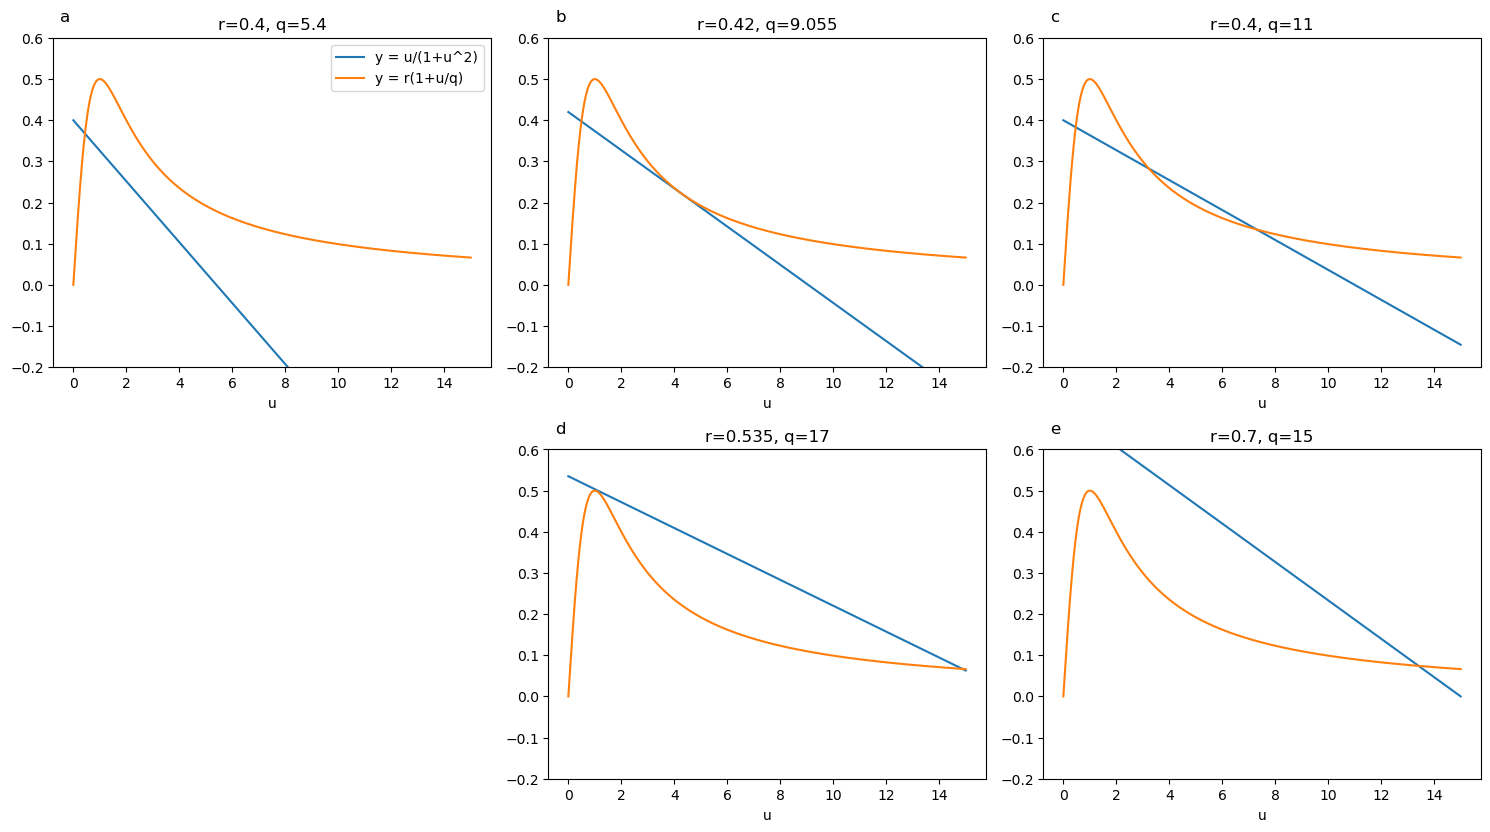

In [41]:
fig1, axs1 = plt.subplot_mosaic(mosaic, figsize=(15, 8))
fig1.tight_layout()
fig1.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

subfig_lab = ['a', 'b', 'c', 'd', 'e', 'f']
x = [-0.5, -1]
y = [0.64, 2.1]

r = [0.4, 0.42, 0.4, 0.535, 0.7]
q = [5.4, 9.055, 11, 17, 15]

u = np.arange(0, 15.01, 0.01)
u2 = np.arange(-1, 15.01, 0.01)


for i in range(len(r)):
    axs1[subfig_lab[i]].plot(u, left_term(u,r[i],q[i]), label='y = u/(1+u^2)')
    axs1[subfig_lab[i]].plot(u, right_term(u,r[i],q[i]), label='y = r(1+u/q)')
    axs1[subfig_lab[i]].set_ylim([-0.2, 0.6])
    axs1[subfig_lab[i]].set_title(f'r={r[i]}, q={q[i]}')
    axs1[subfig_lab[i]].text(x[0], y[0], subfig_lab[i], fontsize=12)
    axs1[subfig_lab[i]].set_xlabel('u')


axs1[subfig_lab[0]].legend(loc='upper right')

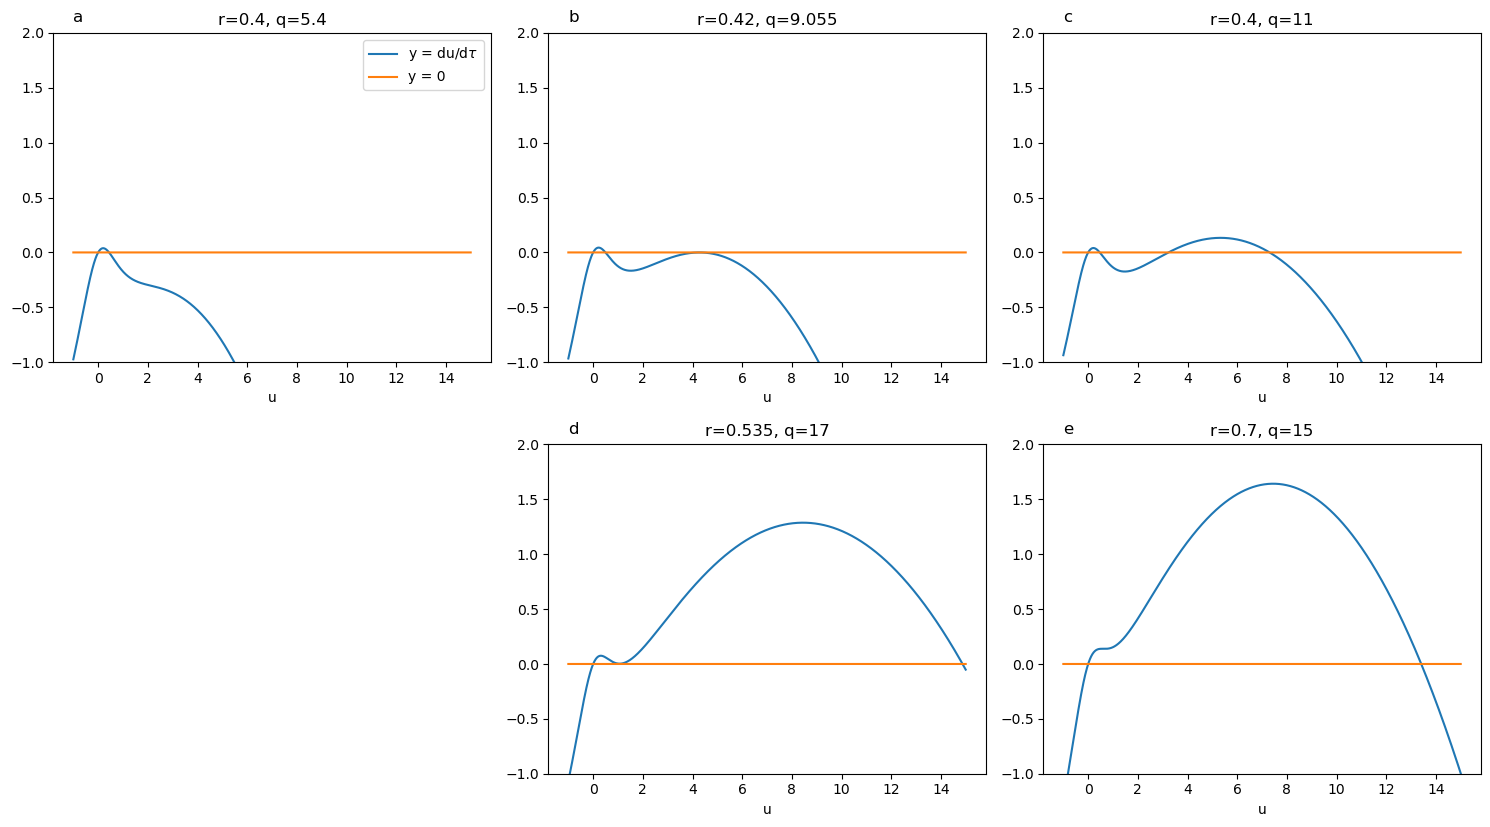

In [42]:
fig2, axs2 = plt.subplot_mosaic(mosaic, figsize=(15, 8))
fig2.tight_layout()
fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

for i in range(len(r)):
    axs2[subfig_lab[i]].plot(u2, dudt(u2,r[i],q[i]),label='y = du/d$\\tau$')
    axs2[subfig_lab[i]].plot(u2, np.zeros(len(u2)),label='y = 0')
    axs2[subfig_lab[i]].set_title(f'r={r[i]}, q={q[i]}')
    axs2[subfig_lab[i]].set_ylim([-1, 2])
    axs2[subfig_lab[i]].set_xlabel('u')
    axs2[subfig_lab[i]].text(x[1], y[1], subfig_lab[i], fontsize=12)

axs2[subfig_lab[0]].legend()